In [2]:
!pip install pandas nltk gensim matplotlib scikit-learn


In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json"
df = pd.read_json(url)
df.head()



,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [12]:
import re
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vatch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
def preprocess(text):
    return simple_preprocess(text, deacc=True)
texts = df['content'].astype(str).tolist()
processed_texts = [preprocess(text) for text in texts]
print(processed_texts[:5])
labels = df['target'].tolist()
print(labels[:5])

[['from', 'lerxst', 'wam', 'umd', 'edu', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst'],

In [8]:
print(df.columns)


Index(['content', 'target', 'target_names'], dtype='object')


In [13]:
from gensim.models import Word2Vec
model = Word2Vec(
    sentences=processed_texts,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1  
)


In [14]:
key_terms = ['data', 'trump', 'market', 'health', 'technology']

for term in key_terms:
    if term in model.wv:
        print(f"\n🔹 Similar words to '{term}':")
        similar_words = model.wv.most_similar(term, topn=5)
        for word, score in similar_words:
            print(f"   {word} ({score:.2f})")
    else:
        print(f"'{term}' not found in vocabulary.")



🔹 Similar words to 'data':
   maps (0.65)
   hdtv (0.64)
   electronically (0.64)
   detection (0.64)
   feeds (0.63)

🔹 Similar words to 'trump':
   nebuchadnezzar (0.89)
   morphine (0.89)
   sheol (0.89)
   dinosaur (0.89)
   orwell (0.89)

🔹 Similar words to 'market':
   financing (0.70)
   premium (0.69)
   undertaking (0.69)
   firms (0.69)
   robust (0.68)

🔹 Similar words to 'health':
   dental (0.70)
   insurance (0.68)
   care (0.65)
   providers (0.65)
   prevention (0.65)

🔹 Similar words to 'technology':
   institute (0.75)
   eth (0.67)
   pasadena (0.64)
   zurich (0.62)
   korea (0.62)


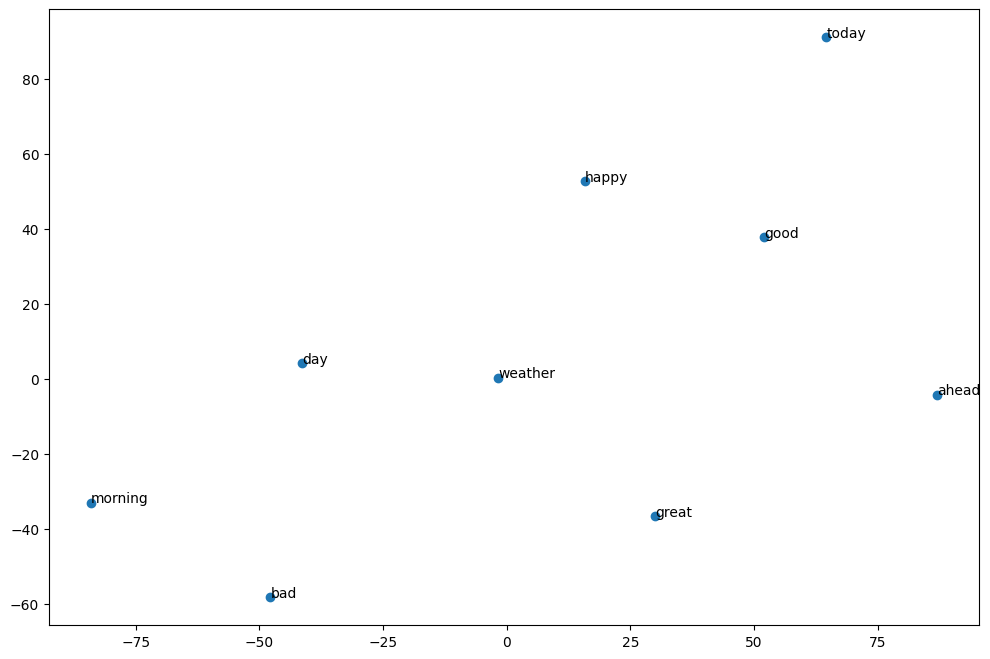

In [18]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
texts = [['happy', 'good', 'morning'], ['bad', 'weather', 'today'], ['great', 'day', 'ahead']]
model = Word2Vec(sentences=texts, vector_size=50, window=3, min_count=1, workers=4)
word_vectors = np.array([model.wv[word] for text in texts for word in text])
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  
vectors_2d = tsne.fit_transform(word_vectors)
plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
for i, word in enumerate(['happy', 'good', 'morning', 'bad', 'weather', 'today', 'great', 'day', 'ahead']):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.show()

